In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [ ]:
#code fomr https://www.datacamp.com/tutorial/random-forests-classifier-python

In [8]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [9]:
adultdataopt =  pd.read_csv('data/cleanedadult.csv', sep=",")
adultdataopt.head()

,Age,WorkClass,Education,Marital-Status,Occupation,Race,Sex,Capital-Gain,Capital-Loss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


In [10]:
adultdataoptdummy = pd.get_dummies(adultdataopt)
adultdataoptdummy.head()

,Age,Capital-Gain,Capital-Loss,HoursPerWeek,WorkClass_ ?,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Never-worked,WorkClass_ Private,WorkClass_ Self-emp-inc,...,NativeCountry_ Scotland,NativeCountry_ South,NativeCountry_ Taiwan,NativeCountry_ Thailand,NativeCountry_ Trinadad&Tobago,NativeCountry_ United-States,NativeCountry_ Vietnam,NativeCountry_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,2174,0,40,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,0,0,13,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,0,0,40,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
3,53,0,0,40,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,28,0,0,40,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [11]:
# Split our preprocessed data into our features and target arrays
X = adultdataoptdummy.drop(["Income_ <=50K"], axis='columns')
y = adultdataoptdummy["Income_ <=50K"]

In [12]:
# X = adultdataopt.drop(["Income_ <=50K"], axis='columns').values
# y = adultdataopt["Income_ <=50K"].values

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
y_pred = rf.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


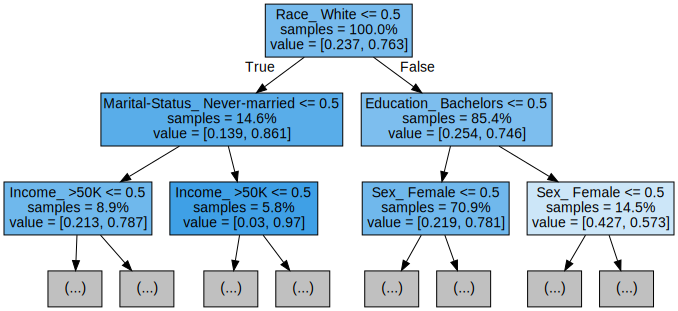

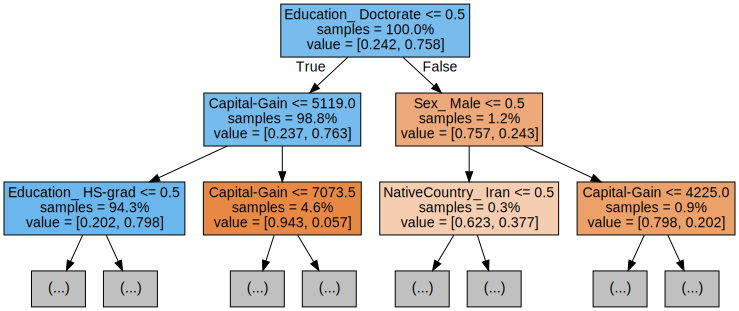

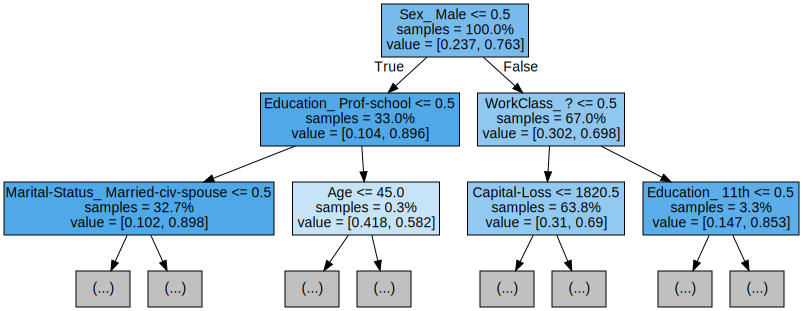

In [17]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [18]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CDF7218670>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CDF71CB7C0>})

In [19]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 250}


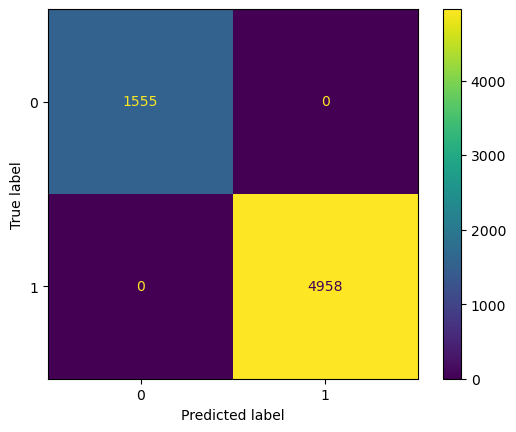

In [20]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [22]:
#Score are too high. The results are unrealistic. 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


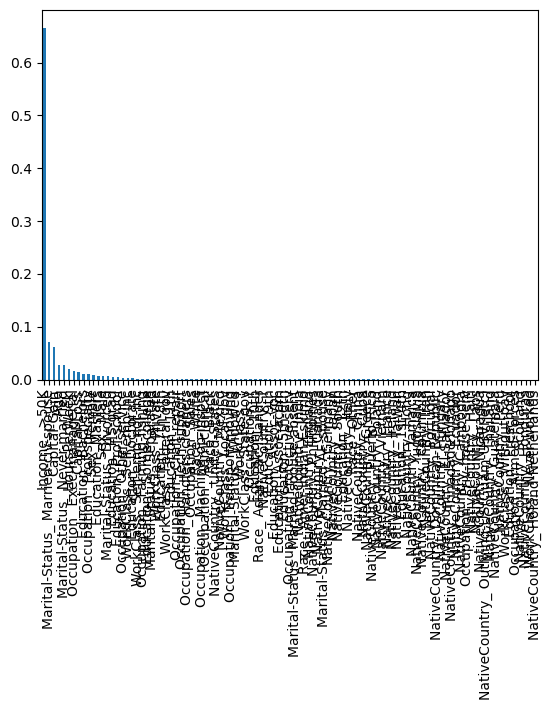

In [24]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

#Result is too messy, the x-axis has the names of each important feature overlap one another. 